In [56]:
from skimage import io
import skimage
from skimage import data
from skimage.color import rgb2hsv
import numpy as np
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Preprocess Data

In [79]:
def calc_stats(filename):
    image = io.imread(filename)
    shape_val = image.shape
    
    width = shape_val[1]
    height = shape_val[0]
    
    hsv_img = rgb2hsv(image)
    
    hue_img = hsv_img[:, :, 0]
    hue_avg = np.mean(hue_img, axis=(0,1))
    
    saturation_img = hsv_img[:,:, 1]
    saturation_avg = np.mean(saturation_img, axis=(0,1))
    
    value_img = hsv_img[:, :, 2]
    value_avg = np.mean(value_img, axis=(0,1))
    
    resolution = width*height
    
    image_stats = [filename ,width, height, hue_avg, saturation_avg, value_avg, resolution]
    return image_stats

In [80]:
stat_list = []
for path, idk, image_list in os.walk('./data/posters/fantasy'):
    for imagename in image_list:
        stat_list.append(calc_stats(path+'/'+imagename))

In [81]:
fantasy_stats = pd.DataFrame(stat_list, columns=['filename' ,'width', 'height', 'mean hue', 'mean saturation', 'mean value', 'resolution'])

In [82]:
fantasy_stats.head()

,filename,width,height,mean hue,mean saturation,mean value,resolution
0,./data/posters/fantasy/109356.jpg,182,268,0.539367,0.522402,0.380489,48776
1,./data/posters/fantasy/110527.jpg,182,268,0.618039,0.372522,0.416437,48776
2,./data/posters/fantasy/110148.jpg,182,268,0.114299,0.524769,0.330444,48776
3,./data/posters/fantasy/82198.jpg,182,268,0.320213,0.412915,0.214963,48776
4,./data/posters/fantasy/119784.jpg,182,268,0.562902,0.606115,0.268397,48776


In [83]:
stat_list = []
for path, idk, image_list in os.walk('./data/posters/drama'):
    for imagename in image_list:
        try:
            stat_list.append(calc_stats(path+'/'+imagename))
        except:
            continue

In [84]:
drama_stats = pd.DataFrame(stat_list, columns=['filename' ,'width', 'height', 'mean hue', 'mean saturation', 'mean value', 'resolution'])

In [85]:
drama_stats = drama_stats.head(118)

In [ ]:
fantasy_stats.to_csv('fantasy.csv')

In [ ]:
drama_stats.to_csv('drama.csv')

# Display Results For Fantasy Movies

In [86]:
%matplotlib inline

In [87]:
from matplotlib import pyplot as plt

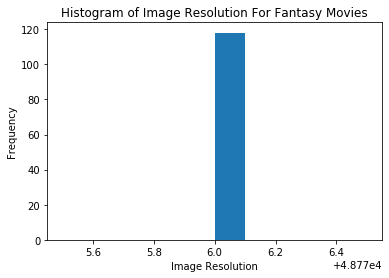

In [88]:
fantasy_stats['resolution'].plot(kind='hist')
plt.title('Histogram of Image Resolution For Fantasy Movies')
plt.xlabel('Image Resolution')
plt.show()

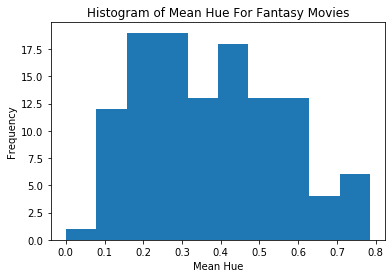

In [89]:
fantasy_stats['mean hue'].plot(kind='hist')
plt.title('Histogram of Mean Hue For Fantasy Movies')
plt.xlabel('Mean Hue')
plt.show()

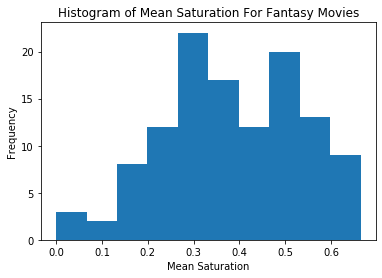

In [90]:
fantasy_stats['mean saturation'].plot(kind='hist')
plt.title('Histogram of Mean Saturation For Fantasy Movies')
plt.xlabel('Mean Saturation')
plt.show()

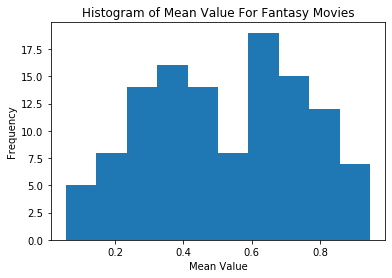

In [91]:
fantasy_stats['mean value'].plot(kind='hist')
plt.title('Histogram of Mean Value For Fantasy Movies')
plt.xlabel('Mean Value')
plt.show()

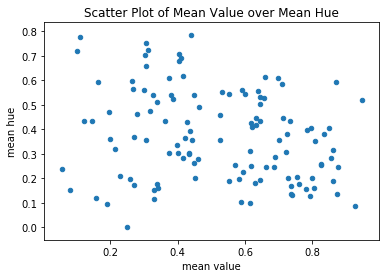

In [92]:
fantasy_stats.plot(kind='scatter', x='mean value', y='mean hue')
plt.title('Scatter Plot of Mean Value over Mean Hue')
plt.show()

# Display Results For Drama Movies

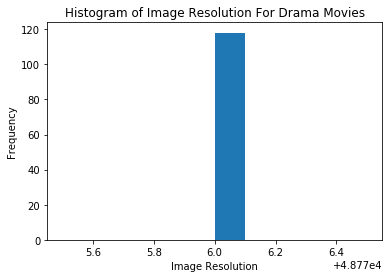

In [93]:
drama_stats['resolution'].plot(kind='hist')
plt.title('Histogram of Image Resolution For Drama Movies')
plt.xlabel('Image Resolution')
plt.show()

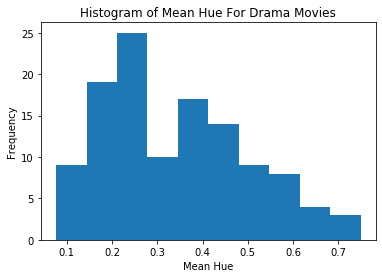

In [94]:
drama_stats['mean hue'].plot(kind='hist')
plt.title('Histogram of Mean Hue For Drama Movies')
plt.xlabel('Mean Hue')
plt.show()

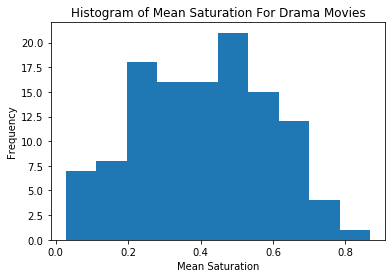

In [95]:
drama_stats['mean saturation'].plot(kind='hist')
plt.title('Histogram of Mean Saturation For Drama Movies')
plt.xlabel('Mean Saturation')
plt.show()

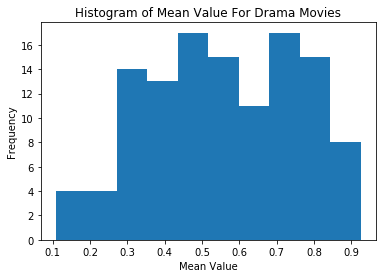

In [96]:
drama_stats['mean value'].plot(kind='hist')
plt.title('Histogram of Mean Value For Drama Movies')
plt.xlabel('Mean Value')
plt.show()

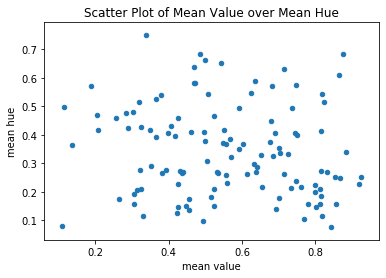

In [97]:
drama_stats.plot(kind='scatter', x='mean value', y='mean hue')
plt.title('Scatter Plot of Mean Value over Mean Hue')
plt.show()

# Make Thumbnails And Plot Results

In [48]:
def make_thumbnail(filename, imagepath, thumbnailpath):
    image = Image.open(imagepath+'/'+filename)
    size = 128, 128
    image.thumbnail(size)
    image.save(thumbnailpath+'/'+filename)

In [49]:
if not os.path.exists('./data/posters/fantasy-thumbnails'):
    os.makedirs('./data/posters/fantasy-thumbnails')

In [60]:
for path, idk, image_list in os.walk('./data/posters/fantasy'):
    for imagename in image_list:
        make_thumbnail(imagename, './data/posters/fantasy', 'data/posters/fantasy-thumbnails')

[]
['109356.jpg']
['109356.jpg', '110527.jpg']
['109356.jpg', '110527.jpg', '110148.jpg']
['109356.jpg', '110527.jpg', '110148.jpg', '82198.jpg']
['109356.jpg', '110527.jpg', '119784.jpg', '110148.jpg', '82198.jpg']
['109356.jpg', '110527.jpg', '119784.jpg', '110148.jpg', '116365.jpg', '82198.jpg']
['109356.jpg', '110527.jpg', '119784.jpg', '110148.jpg', '116365.jpg', '82198.jpg', '91203.jpg']
['109356.jpg', '110527.jpg', '119784.jpg', '110148.jpg', '111686.jpg', '116365.jpg', '82198.jpg', '91203.jpg']
['109356.jpg', '110527.jpg', '119784.jpg', '110148.jpg', '107688.jpg', '111686.jpg', '116365.jpg', '82198.jpg', '91203.jpg']
['109356.jpg', '110527.jpg', '119784.jpg', '110148.jpg', '107688.jpg', '111686.jpg', '116365.jpg', '120632.jpg', '82198.jpg', '91203.jpg']
['109356.jpg', '110527.jpg', '119784.jpg', '110148.jpg', '107688.jpg', '111686.jpg', '116365.jpg', '120632.jpg', '112682.jpg', '82198.jpg', '91203.jpg']
['109356.jpg', '110527.jpg', '119784.jpg', '110148.jpg', '107688.jpg', '111

['115963.jpg', '119484.jpg', '115725.jpg', '118688.jpg', '111112.jpg', '109813.jpg', '118998.jpg', '120524.jpg', '101765.jpg', '120491.jpg', '107120.jpg', '112854.jpg', '117924.jpg', '103874.jpg', '114241.jpg', '115986.jpg', '117038.jpg', '112642.jpg', '101775.jpg', '108500.jpg', '103919.jpg', '110074.jpg', '109356.jpg', '110527.jpg', '119784.jpg', '110148.jpg', '107688.jpg', '111686.jpg', '116365.jpg', '116669.jpg', '109592.jpg', '119528.jpg', '120632.jpg', '112682.jpg', '113303.jpg', '101917.jpg', '113409.jpg', '98382.jpg', '84503.jpg', '97981.jpg', '82198.jpg', '91203.jpg', '67992.jpg', '50976.jpg', '61715.jpg', '62711.jpg', '81534.jpg', '53271.jpg', '75704.jpg', '32138.jpg', '42332.jpg', '82263.jpg', '89853.jpg', '38300.jpg', '89731.jpg', '76054.jpg', '99653.jpg']
['115963.jpg', '119484.jpg', '115725.jpg', '113419.jpg', '118688.jpg', '111112.jpg', '109813.jpg', '118998.jpg', '120524.jpg', '101765.jpg', '120491.jpg', '107120.jpg', '112854.jpg', '117924.jpg', '103874.jpg', '114241.jp

['38650.jpg', '115963.jpg', '82509.jpg', '119484.jpg', '115725.jpg', '97351.jpg', '113419.jpg', '93629.jpg', '113819.jpg', '97576.jpg', '108071.jpg', '107756.jpg', '118688.jpg', '93191.jpg', '111112.jpg', '109813.jpg', '118998.jpg', '120524.jpg', '39420.jpg', '101765.jpg', '13442.jpg', '71607.jpg', '120491.jpg', '107120.jpg', '112854.jpg', '117924.jpg', '103874.jpg', '114241.jpg', '115986.jpg', '117038.jpg', '112642.jpg', '101775.jpg', '108500.jpg', '103919.jpg', '110074.jpg', '109356.jpg', '110527.jpg', '119784.jpg', '110148.jpg', '107688.jpg', '111686.jpg', '116365.jpg', '116669.jpg', '109592.jpg', '119528.jpg', '120632.jpg', '112682.jpg', '113303.jpg', '101917.jpg', '113409.jpg', '98382.jpg', '84503.jpg', '97981.jpg', '82198.jpg', '91203.jpg', '67992.jpg', '50976.jpg', '61715.jpg', '62711.jpg', '81534.jpg', '53271.jpg', '75704.jpg', '120133.jpg', '120148.jpg', '112462.jpg', '109127.jpg', '112817.jpg', '110027.jpg', '117372.jpg', '32138.jpg', '113089.jpg', '42332.jpg', '109506.jpg', 

['38650.jpg', '115963.jpg', '82509.jpg', '119484.jpg', '115725.jpg', '97351.jpg', '113419.jpg', '93629.jpg', '113819.jpg', '97576.jpg', '108071.jpg', '107756.jpg', '118688.jpg', '93191.jpg', '111112.jpg', '109813.jpg', '118998.jpg', '120524.jpg', '39420.jpg', '101765.jpg', '13442.jpg', '71607.jpg', '120491.jpg', '107120.jpg', '112854.jpg', '117924.jpg', '93779.jpg', '103874.jpg', '99700.jpg', '114241.jpg', '115986.jpg', '117038.jpg', '29162.jpg', '112642.jpg', '101775.jpg', '29992.jpg', '84516.jpg', '108500.jpg', '52722.jpg', '56801.jpg', '103919.jpg', '110074.jpg', '109356.jpg', '110527.jpg', '119784.jpg', '110148.jpg', '107688.jpg', '111686.jpg', '116365.jpg', '93199.jpg', '116669.jpg', '109592.jpg', '119528.jpg', '120632.jpg', '112682.jpg', '113303.jpg', '101917.jpg', '56095.jpg', '113409.jpg', '106220.jpg', '98382.jpg', '110475.jpg', '116707.jpg', '84503.jpg', '110719.jpg', '97981.jpg', '113670.jpg', '120479.jpg', '82198.jpg', '91203.jpg', '117894.jpg', '116756.jpg', '67992.jpg', '

In [98]:
if not os.path.exists('results'):
    os.makedirs('results')

Text(0.5, 1.0, 'Mean Value VS Mean Saturation')

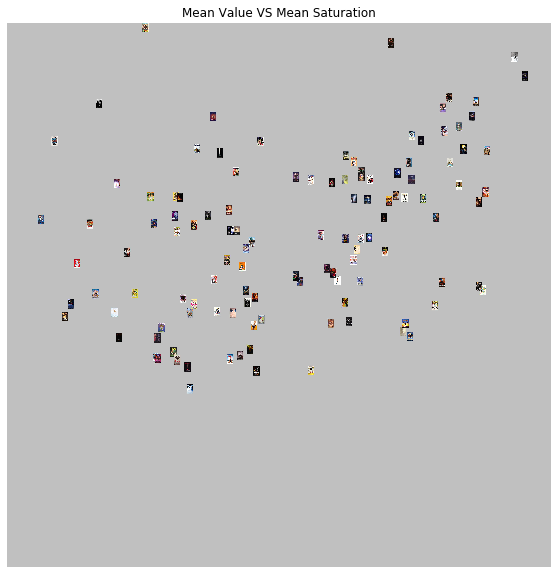

In [99]:
GLOBAL_WIDTH = 7500
bg_color = (192, 192, 192) # gray, you can choose your own
figure = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)
coords = [(int(i[0]*GLOBAL_WIDTH),int(i[1]*GLOBAL_WIDTH)) for i in fantasy_stats[['mean value','mean saturation']].values]
for path, idk, image_list in os.walk('./data/posters/fantasy-thumbnails'):
    for image_idx in range(len(image_list)):
        thumb_img = Image.open(path+'/'+image_list[image_idx])
        figure.paste(thumb_img, coords[image_idx])

figure.save("results/fantasy-bitmap-value-vs-saturation.jpg")
        
image = plt.imread("results/fantasy-bitmap-value-vs-saturation.jpg")

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image)
ax.axis('off')  # clear x-axis and y-axis
ax.set_title("Mean Value VS Mean Saturation")

Text(0.5, 1.0, 'Mean Value VS Mean Hue')

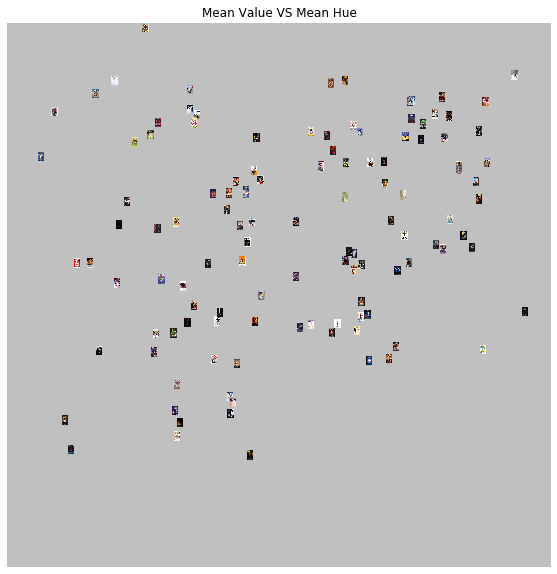

In [101]:
GLOBAL_WIDTH = 7500
bg_color = (192, 192, 192) # gray, you can choose your own
figure = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)
coords = [(int(i[0]*GLOBAL_WIDTH),int(i[1]*GLOBAL_WIDTH)) for i in fantasy_stats[['mean value','mean hue']].values]
for path, idk, image_list in os.walk('./data/posters/fantasy-thumbnails'):
    for image_idx in range(len(image_list)):
        thumb_img = Image.open(path+'/'+image_list[image_idx])
        figure.paste(thumb_img, coords[image_idx])

figure.save("results/fantasy-bitmap-value-vs-hue.jpg")
        
image = plt.imread("results/fantasy-bitmap-value-vs-hue.jpg")

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image)
ax.axis('off')  # clear x-axis and y-axis
ax.set_title("Mean Value VS Mean Hue")

In [ ]:
if not os.path.exists('./data/posters/drama-thumbnails'):
    os.makedirs('./data/posters/drama-thumbnails')

In [ ]:
idx = 0
for path, idk, image_list in os.walk('./data/posters/drama'):
    print(image_list)
    for imagename in image_list:
        if idx!=118:
            make_thumbnail(imagename, './data/posters/drama', 'data/posters/drama-thumbnails')
            idx+=1

Text(0.5, 1.0, 'Mean Value VS Mean Saturation')

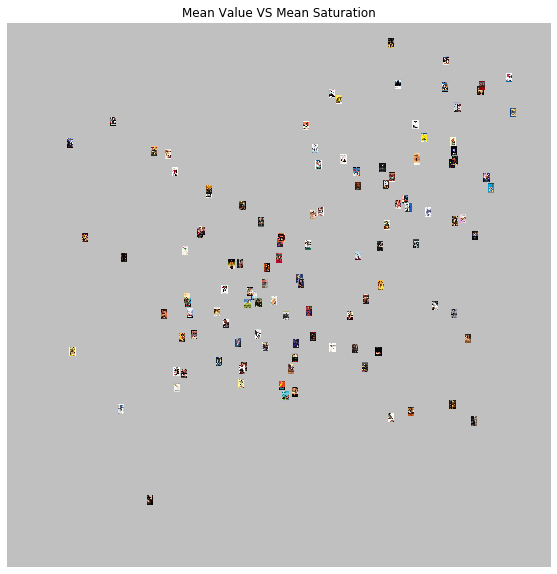

In [102]:
GLOBAL_WIDTH = 7500
bg_color = (192, 192, 192) # gray, you can choose your own
figure = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)
coords = [(int(i[0]*GLOBAL_WIDTH),int(i[1]*GLOBAL_WIDTH)) for i in drama_stats[['mean value','mean saturation']].values]
for path, idk, image_list in os.walk('./data/posters/drama-thumbnails'):
    for image_idx in range(len(image_list)):
        thumb_img = Image.open(path+'/'+image_list[image_idx])
        figure.paste(thumb_img, coords[image_idx])

figure.save("results/drama-bitmap-value-vs-saturation.jpg")
        
image = plt.imread("results/drama-bitmap-value-vs-saturation.jpg")

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image)
ax.axis('off')  # clear x-axis and y-axis
ax.set_title("Mean Value VS Mean Saturation")

Text(0.5, 1.0, 'Mean Value VS Mean Hue')

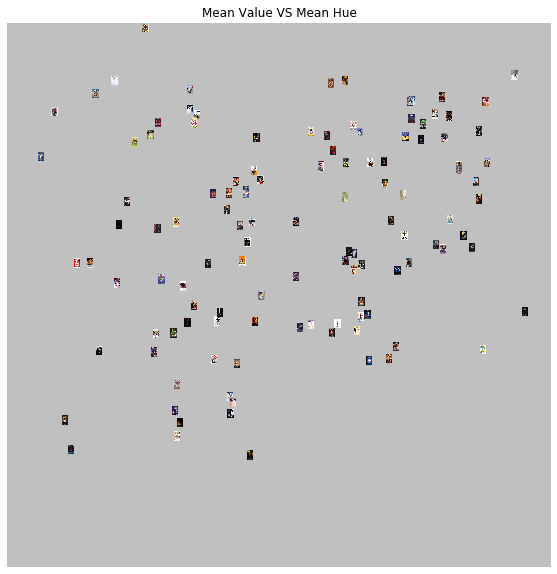

In [103]:
GLOBAL_WIDTH = 7500
bg_color = (192, 192, 192) # gray, you can choose your own
figure = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)
coords = [(int(i[0]*GLOBAL_WIDTH),int(i[1]*GLOBAL_WIDTH)) for i in fantasy_stats[['mean value','mean hue']].values]
for path, idk, image_list in os.walk('./data/posters/fantasy-thumbnails'):
    for image_idx in range(len(image_list)):
        thumb_img = Image.open(path+'/'+image_list[image_idx])
        figure.paste(thumb_img, coords[image_idx])

figure.save("results/drama-fantasy-bitmap-value-vs-hue.jpg")
        
image = plt.imread("results/drama-fantasy-bitmap-value-vs-hue.jpg")

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image)
ax.axis('off')  # clear x-axis and y-axis
ax.set_title("Mean Value VS Mean Hue")